In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving engine_failure_dataset.csv to engine_failure_dataset.csv


In [3]:
df = pd.read_csv(next(iter(uploaded)))
df.head()

,Time_Stamp,Temperature (°C),RPM,Fuel_Efficiency,Vibration_X,Vibration_Y,Vibration_Z,Torque,Power_Output (kW),Fault_Condition,Operational_Mode
0,24-12-2024 10:00,60.308585,3426.827588,20.445472,0.874657,0.005686,0.529798,107.877658,23.367684,2,Idle
1,24-12-2024 10:05,112.705055,2949.758424,23.083947,0.696461,0.391779,0.124336,60.351655,57.941022,3,Cruising
2,24-12-2024 10:10,108.670976,1817.971040,20.555326,0.495276,0.189714,0.886417,110.986564,47.732998,2,Cruising
3,24-12-2024 10:15,107.114691,2730.660539,23.226431,0.986206,0.983202,0.468114,77.416793,44.112039,2,Cruising
4,24-12-2024 10:20,118.075814,1854.488677,21.148226,0.710810,0.101139,0.481034,100.475881,80.681972,2,Cruising


In [4]:
df = df.drop(columns=["Time_Stamp", "Operational_Mode"])

In [5]:
X = df.drop(columns=["Fault_Condition"])
y = df["Fault_Condition"]


In [6]:
X_normal = X[y == 2]

In [7]:
scaler = StandardScaler()
X_normal_scaled = scaler.fit_transform(X_normal)
X_all_scaled = scaler.transform(X)

In [8]:
X_train, X_val = train_test_split(X_normal_scaled, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)

Train shape: (212, 8)
Validation shape: (53, 8)


In [9]:
input_dim = X_train.shape[1]

In [10]:
input_layer = Input(shape=(input_dim,))
encoded = Dense(6, activation='relu')(input_layer)
encoded = Dense(4, activation='relu')(encoded)

In [11]:
decoded = Dense(6, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

In [12]:
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │            56 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168 (672.00 B)

 Trainable params: 168 (672.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_val, X_val),
    verbose=1
)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 1.1568 - val_loss: 1.1567
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0892 - val_loss: 1.1097
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0490 - val_loss: 1.0760
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0053 - val_loss: 1.0546
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0030 - val_loss: 1.0374
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0149 - val_loss: 1.0244
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9618 - val_loss: 1.0143
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9958 - val_loss: 1.0055
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9717 - val_loss: 0.9981
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9640 - val_loss: 0.9911
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9657 - val_loss: 0.9838
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9505 - val

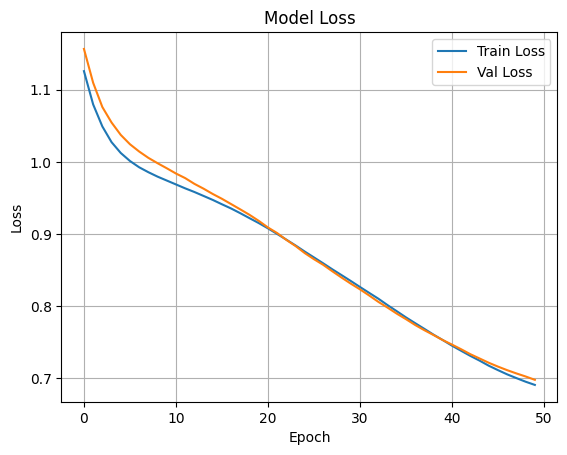

In [14]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
X_pred = autoencoder.predict(X_all_scaled)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [16]:
mse = np.mean(np.power(X_all_scaled - X_pred, 2), axis=1)
df['Reconstruction_Error'] = mse

In [17]:
threshold = np.mean(mse[y == 2]) + 2 * np.std(mse[y == 2])
print("Anomaly threshold:", threshold)

Anomaly threshold: 1.2841781818660025


In [18]:
df['Anomaly'] = df['Reconstruction_Error'] > threshold

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y != 2, df['Anomaly']))
print(classification_report(y != 2, df['Anomaly']))


[[254  11]
 [701  34]]
              precision    recall  f1-score   support

       False       0.27      0.96      0.42       265
        True       0.76      0.05      0.09       735

    accuracy                           0.29      1000
   macro avg       0.51      0.50      0.25      1000
weighted avg       0.63      0.29      0.17      1000

